In [17]:
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
from tqdm.keras import TqdmCallback
from skimage import transform
import tensorflow as tf
import tensorflow_hub as hub

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization, Conv2D,MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_path='/content/drive/MyDrive/DATASET/Eggs Classification/TRAINSET'
test_path='/content/drive/MyDrive/DATASET/Eggs Classification/TESTSET'

#Numeric Constants.
batch_size=32
img_width=299
img_height=299

In [20]:
# generators
train = keras.utils.image_dataset_from_directory(
    directory = train_path,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(299,299)
)

test = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(299,299)
)

Found 1355 files belonging to 2 classes.
Found 83 files belonging to 2 classes.


In [21]:
class_names=train.class_names
print(f"Our target classes are :{class_names}")

Our target classes are :['Damaged', 'Not Damaged']


In [22]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
test = test.map(process)

# **XCEPTION MODEL**

In [23]:
# prompt: generate xception model

base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(img_width, img_height, 3),
    include_top=False
)
num_classes=len(class_names)
base_model.trainable = False
model_ex = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(num_classes)
])


In [24]:
model_ex.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

NUM_EPOCHS=13

In [25]:
history=model_ex.fit(
    train,
    validation_data=test,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping,TqdmCallback(verbose=0)],
    verbose=1
)

0epoch [00:00, ?epoch/s]

Epoch 1/13
43/43 [==============================] - 23s 395ms/step - loss: 0.3591 - acc: 0.8502 - val_loss: 0.4202 - val_acc: 0.7590
Epoch 2/13
43/43 [==============================] - 20s 405ms/step - loss: 0.1943 - acc: 0.9395 - val_loss: 0.3487 - val_acc: 0.7831
Epoch 3/13
43/43 [==============================] - 20s 416ms/step - loss: 0.1466 - acc: 0.9557 - val_loss: 0.2926 - val_acc: 0.8313
Epoch 4/13
43/43 [==============================] - 20s 408ms/step - loss: 0.1194 - acc: 0.9683 - val_loss: 0.2853 - val_acc: 0.8434
Epoch 5/13
43/43 [==============================] - 20s 400ms/step - loss: 0.1011 - acc: 0.9742 - val_loss: 0.2272 - val_acc: 0.8795
Epoch 6/13
43/43 [==============================] - 19s 376ms/step - loss: 0.0852 - acc: 0.9823 - val_loss: 0.2220 - val_acc: 0.8675
Epoch 7/13
43/43 [==============================] - 19s 369ms/step - loss: 0.0759 - acc: 0.9815 - val_loss: 0.2568 - val_acc: 0.8434
Epoch 8/13
43/43 [==============================] - 19s 386ms/step - 

In [26]:
# prompt: access the saved model

model_ex = tf.keras.models.load_model('/content/drive/MyDrive/model_ex')


In [27]:
model_acc='{:.2%}'.format(history.history['acc'][-1])
print(f"\n Our Model Accuracy Reached: {model_acc}")


 Our Model Accuracy Reached: 99.56%


In [28]:
# prompt: evaluate test set and find accuracy

loss, accuracy = model_ex.evaluate(test)
print('Test accuracy :', accuracy*100)


3/3 [==============================] - 2s 188ms/step - loss: 0.1863 - acc: 0.8916
Test accuracy : 89.1566276550293


In [29]:
# prompt: confusion matrix
#error
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the predictions for the test data
predictions = model_ex.predict(test)

# Convert the predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class indices
true_classes = np.array([class_names.index(i) for i in test])

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


3/3 [==============================] - 2s 241ms/step


ValueError: (<tf.Tensor: shape=(32, 299, 299, 3), dtype=float32, numpy=
array([[[[0.69411767, 0.70980394, 0.6431373 ],
         [0.7016303 , 0.71731657, 0.6506499 ],
         [0.70163953, 0.7173258 , 0.65065914],
         ...,
         [0.56888884, 0.593987  , 0.5137255 ],
         [0.5601398 , 0.58276194, 0.49599993],
         [0.6044703 , 0.58009505, 0.50558525]],

        [[0.70321727, 0.73066825, 0.66008   ],
         [0.71207947, 0.73953044, 0.6689422 ],
         [0.7036784 , 0.7311294 , 0.6605412 ],
         ...,
         [0.5717344 , 0.58619535, 0.51693046],
         [0.5715096 , 0.60020983, 0.51696616],
         [0.59798616, 0.59897804, 0.5216994 ]],

        [[0.7095677 , 0.74486184, 0.67035204],
         [0.70432156, 0.7396157 , 0.6651059 ],
         [0.7054036 , 0.74069774, 0.66618794],
         ...,
         [0.58984804, 0.5995213 , 0.539129  ],
         [0.56078434, 0.5882353 , 0.5176471 ],
         [0.57027453, 0.59584224, 0.51542425]],

        ...,

        [[0.44952455, 0.38677946, 0.33182502],
         [0.49746892, 0.42484123, 0.36993927],
         [0.5126369 , 0.43185127, 0.3751197 ],
         ...,
         [0.31373155, 0.3451041 , 0.35477734],
         [0.3137255 , 0.33145106, 0.34500614],
         [0.30956143, 0.3135347 , 0.31154805]],

        [[0.49294275, 0.41838047, 0.37702057],
         [0.48770744, 0.40519708, 0.36205983],
         [0.48779574, 0.3874023 , 0.3441672 ],
         ...,
         [0.30672264, 0.34201676, 0.33438328],
         [0.30705717, 0.326822  , 0.3249924 ],
         [0.29916462, 0.3031379 , 0.30115125]],

        [[0.46529913, 0.39863247, 0.35941675],
         [0.47891912, 0.40425193, 0.3670757 ],
         [0.4744049 , 0.39178964, 0.3486524 ],
         ...,
         [0.28545403, 0.3243026 , 0.29403144],
         [0.29618278, 0.31986922, 0.29806507],
         [0.30135092, 0.30532417, 0.3072074 ]]],


       [[[0.7260738 , 0.6014099 , 0.6057446 ],
         [0.7202964 , 0.60264933, 0.61049247],
         [0.7299167 , 0.6143353 , 0.6263099 ],
         ...,
         [0.16818143, 0.15588374, 0.11290884],
         [0.1607846 , 0.14227846, 0.09773128],
         [0.16993247, 0.14389142, 0.10185588]],

        [[0.7183684 , 0.5937045 , 0.5980392 ],
         [0.7373523 , 0.61970526, 0.6275484 ],
         [0.73173815, 0.6161568 , 0.6281314 ],
         ...,
         [0.15358846, 0.1437435 , 0.10196079],
         [0.15210743, 0.1400345 , 0.10474039],
         [0.17144702, 0.1593741 , 0.13130668]],

        [[0.7262001 , 0.60153615, 0.6058709 ],
         [0.72201455, 0.6043675 , 0.61221063],
         [0.73614836, 0.62056696, 0.63254154],
         ...,
         [0.16072641, 0.16072641, 0.11366759],
         [0.1783593 , 0.1783593 , 0.13914362],
         [0.14984585, 0.15768899, 0.11455174]],

        ...,

        [[0.43700182, 0.3893911 , 0.3521475 ],
         [0.42784914, 0.38913515, 0.3418255 ],
         [0.41445675, 0.38700578, 0.32426065],
         ...,
         [0.2668339 , 0.23567103, 0.20615442],
         [0.2753035 , 0.23608781, 0.2007937 ],
         [0.29367197, 0.2356747 , 0.20781058]],

        [[0.419859  , 0.36935657, 0.33282307],
         [0.42207947, 0.3828638 , 0.33580497],
         [0.4278065 , 0.393128  , 0.33399668],
         ...,
         [0.2726063 , 0.2513522 , 0.21791403],
         [0.27595973, 0.24066558, 0.21383022],
         [0.2933643 , 0.23570724, 0.21630189]],

        [[0.42380512, 0.3854157 , 0.3449606 ],
         [0.39497676, 0.36642382, 0.31403363],
         [0.4079663 , 0.38443688, 0.32169178],
         ...,
         [0.24752773, 0.23258406, 0.19728993],
         [0.28238562, 0.2470915 , 0.22748365],
         [0.28266075, 0.22899815, 0.21934287]]],


       [[[0.09713291, 0.10105448, 0.07752506],
         [0.09648759, 0.0963302 , 0.07484027],
         [0.09920636, 0.0911009 , 0.07149306],
         ...,
         [0.05464059, 0.04705882, 0.02745098],
         [0.06139437, 0.04586511, 0.02813955],
         [0.0659781 , 0.04637026, 0.03068398]],

        [[0.093256  , 0.09717757, 0.07364815],
         [0.07966307, 0.07950568, 0.05801575],
         [0.09586156, 0.0877561 , 0.06814826],
         ...,
         [0.06508617, 0.05703318, 0.03742534],
         [0.07746284, 0.0676283 , 0.04802045],
         [0.11927139, 0.11163811, 0.09203026]],

        [[0.08457612, 0.08849768, 0.06496827],
         [0.06918487, 0.06902748, 0.04753755],
         [0.07477212, 0.06666667, 0.04705882],
         ...,
         [0.16317886, 0.12813401, 0.11820546],
         [0.18832135, 0.16334248, 0.14944656],
         [0.19700952, 0.18127154, 0.16365033]],

        ...,

        [[0.13461815, 0.28855622, 0.16601044],
         [0.29060254, 0.40404633, 0.29497007],
         [0.39528447, 0.48815733, 0.3864519 ],
         ...,
         [0.47468036, 0.43938625, 0.40409213],
         [0.504676  , 0.4693819 , 0.43408778],
         [0.51391   , 0.4746943 , 0.4394002 ]],

        [[0.38323402, 0.4166722 , 0.3384505 ],
         [0.39619142, 0.4305948 , 0.3523731 ],
         [0.4233    , 0.46486992, 0.3845563 ],
         ...,
         [0.38345206, 0.36962172, 0.33803952],
         [0.47762793, 0.4501243 , 0.4234551 ],
         [0.48455206, 0.44925794, 0.42551887]],

        [[0.3430669 , 0.41979116, 0.3103268 ],
         [0.30182514, 0.39749646, 0.28086817],
         [0.28164315, 0.37720394, 0.2606125 ],
         ...,
         [0.3935935 , 0.39385486, 0.37607712],
         [0.4581791 , 0.44061056, 0.42884585],
         [0.498494  , 0.45927832, 0.45535675]]],


       ...,


       [[[0.17410748, 0.17143616, 0.17187127],
         [0.16862746, 0.16862746, 0.16862746],
         [0.16470589, 0.16862746, 0.1764706 ],
         ...,
         [0.24626513, 0.22665729, 0.21097101],
         [0.23753083, 0.22714317, 0.20784314],
         [0.21035491, 0.21427648, 0.19466864]],

        [[0.17832613, 0.17691621, 0.16907306],
         [0.17254902, 0.17254902, 0.17254902],
         [0.16470589, 0.16862746, 0.1764706 ],
         ...,
         [0.24626513, 0.22665729, 0.21097101],
         [0.22683537, 0.22352941, 0.20392157],
         [0.20563948, 0.20956105, 0.18995321]],

        [[0.17973638, 0.17964947, 0.16635188],
         [0.17476058, 0.17476058, 0.17033745],
         [0.16883731, 0.17668045, 0.17275888],
         ...,
         [0.24111402, 0.22934932, 0.20974146],
         [0.22101024, 0.22151141, 0.2       ],
         [0.20065592, 0.20849906, 0.18889122]],

        ...,

        [[0.5669812 , 0.6022753 , 0.5946418 ],
         [0.5823467 , 0.6058761 , 0.60216415],
         [0.52974004, 0.5454263 , 0.54150474],
         ...,
         [0.3040264 , 0.3252818 , 0.30959553],
         [0.3170388 , 0.3441655 , 0.31656885],
         [0.33693165, 0.35107386, 0.32362288]],

        [[0.5664566 , 0.60175073, 0.5821429 ],
         [0.6080466 , 0.631576  , 0.6158897 ],
         [0.5459425 , 0.56162876, 0.5577072 ],
         ...,
         [0.30170995, 0.3213178 , 0.30563152],
         [0.3060769 , 0.3335279 , 0.30576912],
         [0.299902  , 0.31950983, 0.29205886]],

        [[0.5959299 , 0.6351456 , 0.60377306],
         [0.6128992 , 0.6367043 , 0.6201908 ],
         [0.5794823 , 0.5951686 , 0.591247  ],
         ...,
         [0.320826  , 0.33805275, 0.32316017],
         [0.3201592 , 0.34761018, 0.3198514 ],
         [0.28501323, 0.31216717, 0.28094316]]],


       [[[0.6563011 , 0.6563011 , 0.64845794],
         [0.66621387, 0.66621387, 0.65837073],
         [0.6435799 , 0.6435799 , 0.63573676],
         ...,
         [0.5718435 , 0.5718435 , 0.57466334],
         [0.5577226 , 0.5577226 , 0.56054246],
         [0.5730061 , 0.5730061 , 0.57582587]],

        [[0.65424556, 0.6620887 , 0.650324  ],
         [0.6475779 , 0.655421  , 0.6436563 ],
         [0.64073235, 0.6485755 , 0.6368108 ],
         ...,
         [0.57155   , 0.57516336, 0.55648017],
         [0.56108516, 0.5646985 , 0.5460154 ],
         [0.5760964 , 0.57970977, 0.5610266 ]],

        [[0.6255345 , 0.6451423 , 0.62945604],
         [0.6167814 , 0.63638926, 0.620703  ],
         [0.619234  , 0.63884187, 0.6231556 ],
         ...,
         [0.6013801 , 0.6053017 , 0.58569384],
         [0.5788511 , 0.5827727 , 0.56316483],
         [0.5890796 , 0.5930012 , 0.57339334]],

        ...,

        [[0.4721613 , 0.4956907 , 0.48784757],
         [0.47653782, 0.50006723, 0.4922241 ],
         [0.48799244, 0.50760025, 0.491914  ],
         ...,
         [0.46923143, 0.47521862, 0.45561078],
         [0.5051944 , 0.509116  , 0.48950818],
         [0.540786  , 0.5376907 , 0.5215913 ]],

        [[0.48839673, 0.5236909 , 0.5197693 ],
         [0.5038221 , 0.53911626, 0.52796715],
         [0.54654735, 0.5705137 , 0.562525  ],
         ...,
         [0.47143304, 0.4774202 , 0.45781237],
         [0.47286353, 0.4767851 , 0.45717725],
         [0.52122134, 0.518126  , 0.5020266 ]],

        [[0.5745531 , 0.6135042 , 0.61210513],
         [0.5627116 , 0.5980057 , 0.59408414],
         [0.58419687, 0.6155217 , 0.6087918 ],
         ...,
         [0.49490672, 0.50089395, 0.48128608],
         [0.4619257 , 0.46584725, 0.44623938],
         [0.50803536, 0.50494003, 0.4888406 ]]],


       [[[0.7769493 , 0.7651846 , 0.70636106],
         [0.7687652 , 0.7570005 , 0.698177  ],
         [0.7767674 , 0.76500267, 0.70617914],
         ...,
         [0.8282792 , 0.8293809 , 0.81118304],
         [0.81833553, 0.8194373 , 0.8012394 ],
         [0.8034864 , 0.8020765 , 0.7942334 ]],

        [[0.75583315, 0.74406844, 0.6852449 ],
         [0.7554125 , 0.7436478 , 0.6848243 ],
         [0.7397747 , 0.72801   , 0.6691865 ],
         ...,
         [0.81822246, 0.820434  , 0.80595636],
         [0.8108336 , 0.8108336 , 0.80299044],
         [0.8160994 , 0.8160994 , 0.8147217 ]],

        [[0.75686276, 0.74509805, 0.6862745 ],
         [0.7529412 , 0.7411765 , 0.68235296],
         [0.7477898 , 0.7360251 , 0.67720157],
         ...,
         [0.8082611 , 0.81610423, 0.8080514 ],
         [0.8146977 , 0.8225408 , 0.81861925],
         [0.81497633, 0.8228195 , 0.8188979 ]],

        ...,

        [[0.8060057 , 0.82561356, 0.84914297],
         [0.8228328 , 0.84244066, 0.8659701 ],
         [0.78931355, 0.80107826, 0.82439786],
         ...,
         [0.19941469, 0.18579404, 0.15049993],
         [0.19136317, 0.1756769 , 0.14038278],
         [0.20625575, 0.17880477, 0.14743221]],

        [[0.79580307, 0.8267949 , 0.8397018 ],
         [0.78720635, 0.81465733, 0.83818674],
         [0.7804086 , 0.7984355 , 0.8278732 ],
         ...,
         [0.19541527, 0.19028446, 0.15277904],
         [0.20546982, 0.19462854, 0.15902661],
         [0.2078107 , 0.19696942, 0.1613675 ]],

        [[0.7716577 , 0.81034416, 0.8184519 ],
         [0.79013115, 0.81758213, 0.84111154],
         [0.78165495, 0.80513656, 0.8378322 ],
         ...,
         [0.19300163, 0.19300163, 0.15378594],
         [0.18872096, 0.19154054, 0.15091506],
         [0.17059888, 0.17341848, 0.132793  ]]]], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int32)>) is not in list

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the predictions for the test data
predictions = model_ex.predict(test)

# Convert the predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Extract the true labels from the test dataset
true_labels = np.concatenate([y for x, y in test], axis=0)  # Assuming 'y' represents the labels in your dataset

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

3/3 [==============================] - 2s 237ms/step
Confusion Matrix:
[[33 14]
 [23 13]]


In [31]:
# prompt: save model_ex to folder in drive

model_ex.save('/content/drive/MyDrive/model_ex')


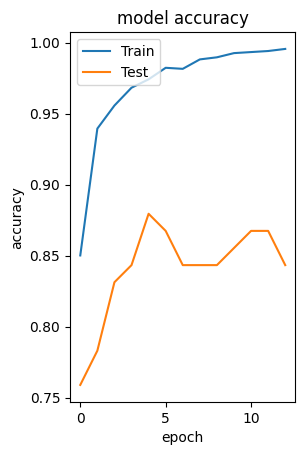

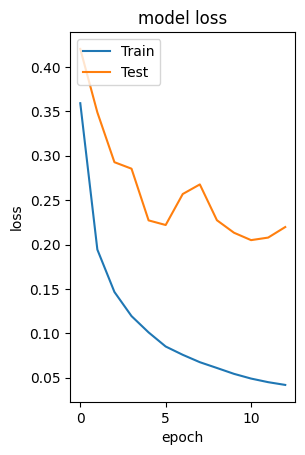

In [32]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 2s 2s/step
The Predicted Class: Not Damaged



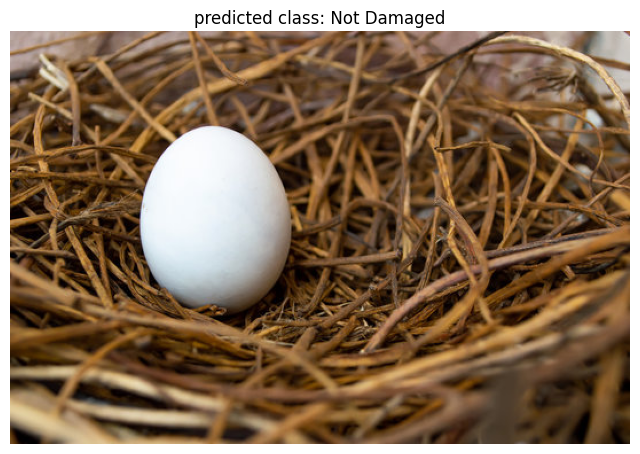

In [33]:
test_img_path = '/content/drive/MyDrive/DATASET/Eggs Classification/good2.jpg'
test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)

prediction = model_ex.predict(test_image)
pred_class = prediction.argmax()
print(f"The Predicted Class: {class_names[pred_class]}\n")

plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("predicted class: "+class_names[pred_class])
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 28ms/step
The Predicted Class: Damaged



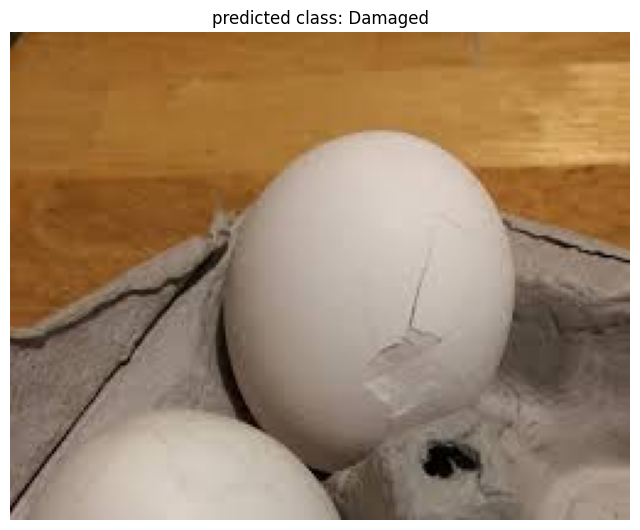

In [34]:
test_img_path = "/content/drive/MyDrive/DATASET/Eggs Classification/images.jpeg"
test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)

prediction = model_ex.predict(test_image)
pred_class = prediction.argmax()
print(f"The Predicted Class: {class_names[pred_class]}\n")

plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("predicted class: "+class_names[pred_class])
plt.axis('off')
plt.show()

In [35]:
!pip install tensorflow-hub

In [36]:
import tensorflow_hub as hub

# **RESNET_MODEL**

In [37]:
inception_resnet_v2_fv = 'https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/5'
feature_extractor_model = inception_resnet_v2_fv
feature_extractor_layer=hub.KerasLayer(
    feature_extractor_model,
    input_shape=(img_width,img_width,3),
    trainable=False
    )
num_classes=len(class_names)
model=tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(num_classes)]
)

In [38]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

NUM_EPOCHS=13

In [39]:
history=model.fit(
    train,
    validation_data=test,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping,TqdmCallback(verbose=0)],
    verbose=1
)

0epoch [00:00, ?epoch/s]

Epoch 1/13
43/43 [==============================] - 51s 706ms/step - loss: 0.3824 - acc: 0.8229 - val_loss: 0.4254 - val_acc: 0.7952
Epoch 2/13
43/43 [==============================] - 20s 415ms/step - loss: 0.2302 - acc: 0.9269 - val_loss: 0.4004 - val_acc: 0.8434
Epoch 3/13
43/43 [==============================] - 21s 424ms/step - loss: 0.1872 - acc: 0.9424 - val_loss: 0.3047 - val_acc: 0.8795
Epoch 4/13
43/43 [==============================] - 21s 413ms/step - loss: 0.1564 - acc: 0.9506 - val_loss: 0.3107 - val_acc: 0.9277
Epoch 5/13
43/43 [==============================] - 20s 405ms/step - loss: 0.1362 - acc: 0.9572 - val_loss: 0.2692 - val_acc: 0.9518
Epoch 6/13
43/43 [==============================] - 22s 441ms/step - loss: 0.1171 - acc: 0.9675 - val_loss: 0.2763 - val_acc: 0.9157
Epoch 7/13
43/43 [==============================] - 21s 431ms/step - loss: 0.1045 - acc: 0.9742 - val_loss: 0.2262 - val_acc: 0.9518
Epoch 8/13
43/43 [==============================] - 22s 449ms/step - 

In [40]:
model_acc='{:.2%}'.format(history.history['acc'][-1])
print(f"\n Our Model Accuracy Reached: {model_acc}")


 Our Model Accuracy Reached: 98.97%


In [41]:
# prompt: evaluate test set and find accuracy

loss, accuracy = model.evaluate(test)
print('Test accuracy :', accuracy*100)
print(loss)


3/3 [==============================] - 2s 263ms/step - loss: 0.2047 - acc: 0.9277
Test accuracy : 92.77108311653137
0.2047092467546463


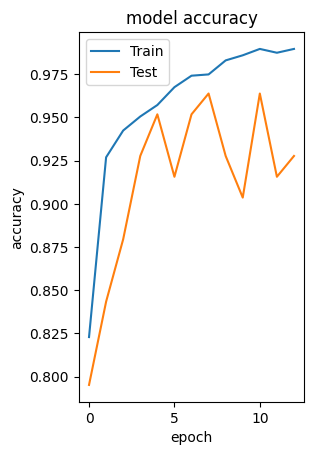

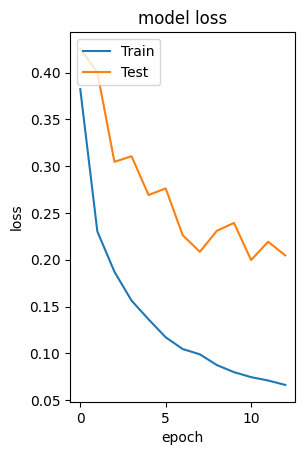

In [42]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 4s 4s/step
The Predicted Class: Not Damaged



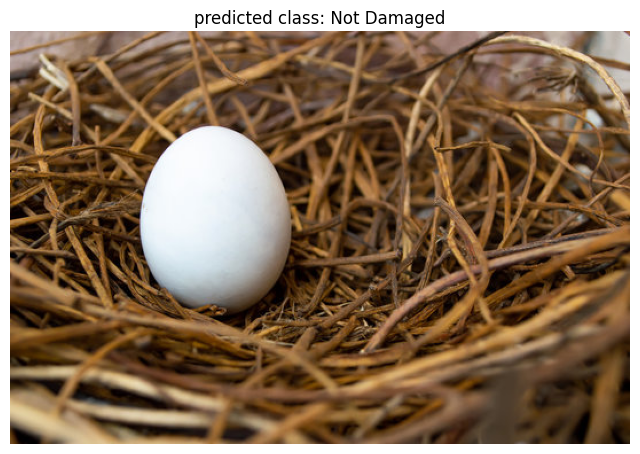

In [43]:
test_img_path = '/content/drive/MyDrive/DATASET/Eggs Classification/good2.jpg'
test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
pred_class = prediction.argmax()
print(f"The Predicted Class: {class_names[pred_class]}\n")

plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("predicted class: "+class_names[pred_class])
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 40ms/step
The Predicted Class: Damaged



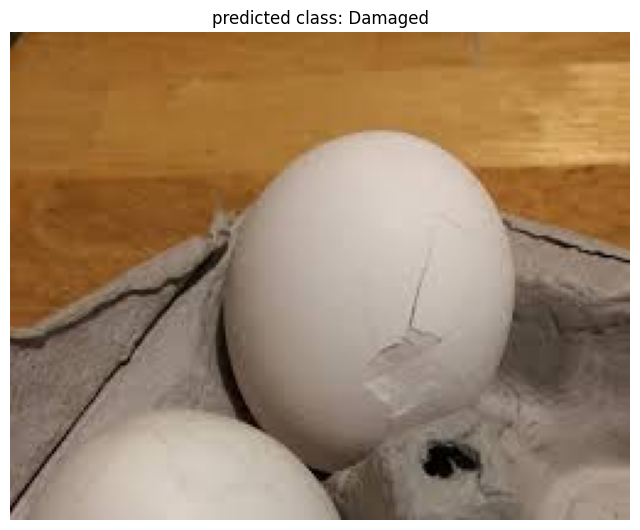

In [44]:
test_img_path = "/content/drive/MyDrive/DATASET/Eggs Classification/images.jpeg"
test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
pred_class = prediction.argmax()
print(f"The Predicted Class: {class_names[pred_class]}\n")

plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("predicted class: "+class_names[pred_class])
plt.axis('off')
plt.show()

# **CUSTOM_CNN_MODEL**

In [45]:
from tensorflow.keras import datasets, layers, models

In [46]:
model_cnn=models.Sequential()
model_cnn.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(299,299,3)))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
model_cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64,activation='relu'))
model_cnn.add(layers.Dense(2,activation='sigmoid'))

In [47]:
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

NUM_EPOCHS=13

In [48]:
history=model_cnn.fit(
    train,
    validation_data=test,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping,TqdmCallback(verbose=0)],
    verbose=1
)

0epoch [00:00, ?epoch/s]

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 6/43 [===>..........................] - ETA: 3s - loss: 5.1407 - acc: 0.4896

43/43 [==============================] - 24s 350ms/step - loss: 1.2175 - acc: 0.7314 - val_loss: 0.7546 - val_acc: 0.5663
Epoch 2/13
43/43 [==============================] - 16s 327ms/step - loss: 0.4979 - acc: 0.7985 - val_loss: 0.8575 - val_acc: 0.5663
Epoch 3/13
43/43 [==============================] - 16s 323ms/step - loss: 0.4284 - acc: 0.8376 - val_loss: 1.0070 - val_acc: 0.5904
Epoch 4/13
43/43 [==============================] - 17s 327ms/step - loss: 0.3706 - acc: 0.8524 - val_loss: 1.0015 - val_acc: 0.5783
Epoch 5/13
43/43 [==============================] - 16s 323ms/step - loss: 0.3041 - acc: 0.8723 - val_loss: 0.9702 - val_acc: 0.5904
Epoch 6/13
43/43 [==============================] - 17s 332ms/step - loss: 0.2761 - acc: 0.9041 - val_loss: 0.8432 - val_acc: 0.5904
Epoch 7/13
43/43 [==============================] - 17s 334ms/step - loss: 0.2474 - acc: 0.9159 - val_loss: 0.7407 - val_acc: 0.6506
Epoch 8/13
43/43 [==============================] - 16s 320ms/step - loss: 0.218

In [49]:
model_acc='{:.2%}'.format(history.history['acc'][-1])
print(f"\n Our Model Accuracy Reached: {model_acc}")


 Our Model Accuracy Reached: 92.77%


In [50]:
# prompt: evaluate test set and find accuracy

loss, accuracy = model_cnn.evaluate(test)
print('Test accuracy :', accuracy*100)
print(loss)

3/3 [==============================] - 1s 39ms/step - loss: 0.8178 - acc: 0.7108
Test accuracy : 71.08433842658997
0.8177880048751831


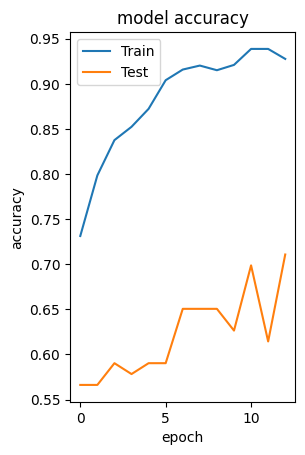

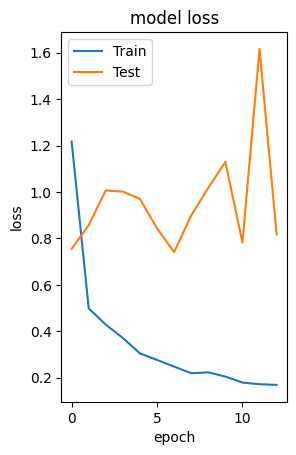

In [51]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 455ms/step
The Predicted Class: Not Damaged



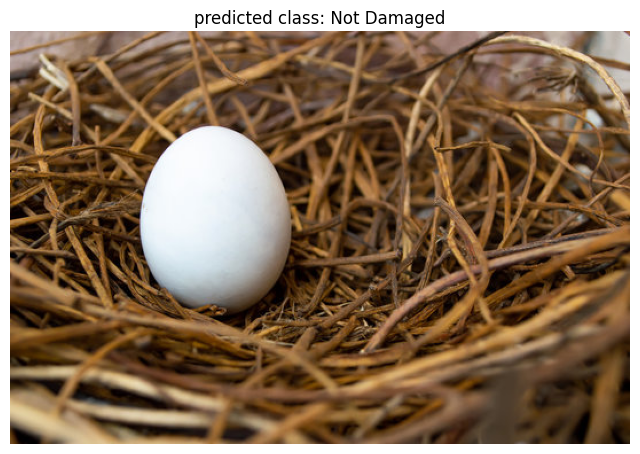

In [52]:
test_img_path = '/content/drive/MyDrive/DATASET/Eggs Classification/good2.jpg'
test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)

prediction = model_cnn.predict(test_image)
pred_class = prediction.argmax()
print(f"The Predicted Class: {class_names[pred_class]}\n")

plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("predicted class: "+class_names[pred_class])
plt.axis('off')
plt.show()